In [150]:
!pip install scikeras

In [151]:
import os
import csv
import keras
import pickle
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from keras.optimizers import Adam
from numpy import mean, array, std
from keras.layers import Input, Dense
from keras.utils import to_categorical
from sklearn.impute import SimpleImputer
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from pandas.core.arrays import categorical
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.constraints import MaxNorm
from sklearn.model_selection import GridSearchCV
from imblearn.metrics import geometric_mean_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, LeakyReLU,ELU, Dropout
from sklearn.metrics import accuracy_score, matthews_corrcoef, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score,StratifiedKFold, train_test_split, train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
!pip install matplotlib seaborn

In [154]:
churn_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Assignment 3/CustomerChurn_dataset.csv")
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [155]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [156]:
# Checking for null columns
null_columns = churn_data.columns[churn_data.isnull().any()]
null_columns

Index([], dtype='object')

In [157]:
# Numeric data
numeric_data = churn_data.select_dtypes(exclude = ["object"])
numeric_data

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [158]:
# Categorical data
categorical_data = churn_data.select_dtypes(include = ["object"])
categorical_data

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [159]:
# Encoding each categorical column
label_encoder = LabelEncoder()
for column in categorical_data:
    if categorical_data[column].dtype == "object":
        categorical_data[column] = label_encoder.fit_transform(categorical_data[column])
categorical_data

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,1597,0
7039,1525,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,5698,0
7040,3367,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,2994,0
7041,5934,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,2660,1


In [160]:
# Combining both the numeric and encoded categorical datasets
combined_churn_data = pd.concat([numeric_data, categorical_data], axis = 1)
combined_churn_data

,SeniorCitizen,tenure,MonthlyCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,29.85,5375,0,1,0,0,1,0,...,2,0,0,0,0,0,1,2,2505,0
1,0,34,56.95,3962,1,0,0,1,0,0,...,0,2,0,0,0,1,0,3,1466,0
2,0,2,53.85,2564,1,0,0,1,0,0,...,2,0,0,0,0,0,1,3,157,1
3,0,45,42.30,5535,1,0,0,0,1,0,...,0,2,2,0,0,1,0,0,1400,0
4,0,2,70.70,6511,0,0,0,1,0,1,...,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,4853,1,1,1,1,2,0,...,0,2,2,2,2,1,1,3,1597,0
7039,0,72,103.20,1525,0,1,1,1,2,1,...,2,2,0,2,2,1,1,1,5698,0
7040,0,11,29.60,3367,0,1,1,0,1,0,...,0,0,0,0,0,0,1,2,2994,0
7041,1,4,74.40,5934,1,1,0,1,2,1,...,0,0,0,0,0,0,1,3,2660,1


In [161]:
# Splitting the data into features (X) and target variable (Y)
X_data = combined_churn_data.drop("Churn", axis = 1)
Y_data = combined_churn_data["Churn"]

In [162]:
# Creating a tree-based model (Random Forest)
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [163]:
# Fitting the model on the entire dataset
model.fit(X_data, Y_data)

RandomForestClassifier(random_state=42)

In [164]:
# Getting feature importances
important_features = model.feature_importances_

In [165]:
# Creating a DataFrame with feature names and their importance scores
important_features = pd.DataFrame({"Feature": X_data.columns, "Importance": important_features})

In [166]:
# Sorting the DataFrame by importance in descending order
important_features = important_features.sort_values(by = "Importance", ascending = False)

In [167]:
# Printing the sorted feature importance DataFrame
print("Feature Importance:")
print(important_features)

Feature Importance:
             Feature  Importance
1             tenure    0.155309
2     MonthlyCharges    0.144160
19      TotalCharges    0.137076
3         customerID    0.129218
16          Contract    0.085843
18     PaymentMethod    0.043760
10    OnlineSecurity    0.042324
13       TechSupport    0.036720
11      OnlineBackup    0.026198
9    InternetService    0.025174
4             gender    0.022828
17  PaperlessBilling    0.022175
12  DeviceProtection    0.020338
5            Partner    0.019591
8      MultipleLines    0.019077
0      SeniorCitizen    0.017549
6         Dependents    0.016682
15   StreamingMovies    0.015991
14       StreamingTV    0.015136
7       PhoneService    0.004853


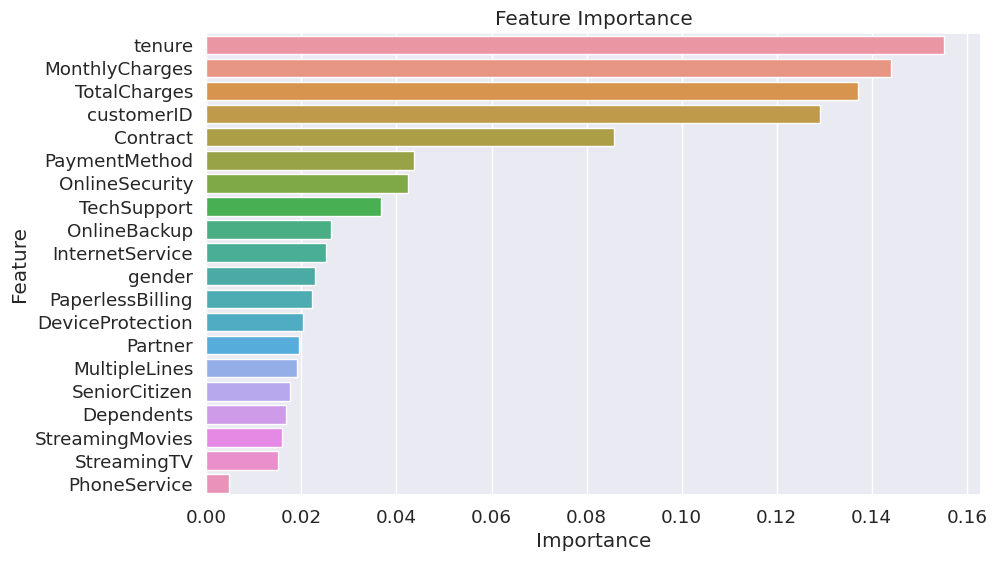

In [168]:
# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x = "Importance", y = "Feature", data = important_features)
plt.title("Feature Importance")
plt.show()

In [169]:
# Selectting the top 10 features based on importance
top_10_features = 10
selected_features = important_features["Feature"].head(top_10_features).tolist()
X_data = combined_churn_data[selected_features]
X_data

,tenure,MonthlyCharges,TotalCharges,customerID,Contract,PaymentMethod,OnlineSecurity,TechSupport,OnlineBackup,InternetService
0,1,29.85,2505,5375,0,2,0,0,2,0
1,34,56.95,1466,3962,1,3,2,0,0,0
2,2,53.85,157,2564,0,3,2,0,2,0
3,45,42.30,1400,5535,1,0,2,2,0,0
4,2,70.70,925,6511,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1597,4853,1,3,2,2,0,0
7039,72,103.20,5698,1525,1,1,0,0,2,1
7040,11,29.60,2994,3367,0,2,2,0,0,0
7041,4,74.40,2660,5934,0,3,0,0,0,1


In [170]:
# Scaling the independent variables / features
SS = StandardScaler()
scaled_X_data = SS.fit_transform(X_data)
X_data = pd.DataFrame(scaled_X_data, columns = X_data.columns)
X_data

,tenure,MonthlyCharges,TotalCharges,customerID,Contract,PaymentMethod,OnlineSecurity,TechSupport,OnlineBackup,InternetService
0,-1.277445,-1.160323,-0.398608,0.911890,-0.828207,0.398558,-0.918838,-0.925262,1.242550,-1.183234
1,0.066327,-0.259629,-0.948762,0.216906,0.371271,1.334863,1.407321,-0.925262,-1.029919,-1.183234
2,-1.236724,-0.362660,-1.641883,-0.470701,-0.828207,1.334863,1.407321,-0.925262,1.242550,-1.183234
3,0.514251,-0.746535,-0.983710,0.990587,0.371271,-1.474052,1.407321,1.396299,-1.029919,-1.183234
4,-1.236724,0.197365,-1.235224,1.470632,-0.828207,0.398558,-0.918838,-0.925262,-1.029919,0.172250
...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.879397,0.655145,0.371271,1.334863,1.407321,1.396299,-1.029919,-1.183234
7039,1.613701,1.277533,1.292099,-0.981733,0.371271,-0.537747,-0.918838,-0.925262,1.242550,0.172250
7040,-0.870241,-1.168632,-0.139680,-0.075745,-0.828207,0.398558,1.407321,-0.925262,-1.029919,-1.183234
7041,-1.155283,0.320338,-0.316534,1.186835,-0.828207,1.334863,-0.918838,-0.925262,-1.029919,0.172250


In [171]:
# Loading the saved scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(SS, scaler_file)

In [172]:
# Combining X_data and Y_data into a single DataFrame for convenience
eda_data = pd.concat([X_data, Y_data], axis = 1)

In [173]:
# Chosen features
selected_features = ["tenure", "MonthlyCharges", "TotalCharges", "customerID", "Contract", "PaymentMethod", "OnlineSecurity", "TechSupport", "OnlineBackup", "InternetService"]

In [174]:
# Formatting the graph's grid design
sns.set_style("whitegrid")
sns.set(font_scale=1.2)

In [175]:
# Setting overall style and font scale
sns.set_style("whitegrid")
sns.set(font_scale=1.2)

In [176]:
# Combining X_data and Y_data into a single DataFrame for convenience
eda_data = pd.concat([X_data, Y_data], axis=1)

In [177]:
# Chosen features
selected_features = ["tenure", "MonthlyCharges", "TotalCharges", "customerID", "Contract", "PaymentMethod", "OnlineSecurity", "TechSupport", "OnlineBackup", "InternetService"]

In [178]:
# Checking if selected features are present in eda_data
for feature in selected_features:
    if feature not in eda_data.columns:
        print(f"Warning: {feature} not found in eda_data columns.")

In [179]:
# Visualizing the relationship between each categorical feature and Y_data using bar plots
for feature in selected_features:
    if feature in eda_data.columns and eda_data[feature].dtype == 'int64':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, hue="Churn", data=eda_data, palette="coolwarm")
        plt.title(f"Churn by {feature}")
        plt.show()

In [180]:
# Splitting the data into training and testing sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state = 42)

In [181]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation = "relu")(input_layer)
hidden_layer_2 = Dense(24, activation = "relu")(hidden_layer_1)
hidden_layer_3 = Dense(12, activation = "relu")(hidden_layer_2)
output_layer = Dense(1, activation = "sigmoid")(hidden_layer_3)

model = Model(inputs = input_layer, outputs = output_layer)

In [182]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(X_train, Y_train, epochs = 150, batch_size = 32, validation_data = (X_test, Y_test))

Epoch 1/150
177/177 [==============================] - 2s 4ms/step - loss: 0.5626 - accuracy: 0.7196 - val_loss: 0.5041 - val_accuracy: 0.7348
Epoch 2/150
177/177 [==============================] - 1s 3ms/step - loss: 0.4943 - accuracy: 0.7389 - val_loss: 0.4611 - val_accuracy: 0.7390
Epoch 3/150
177/177 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.7471 - val_loss: 0.4394 - val_accuracy: 0.7631
Epoch 4/150
177/177 [==============================] - 1s 6ms/step - loss: 0.4546 - accuracy: 0.7666 - val_loss: 0.4271 - val_accuracy: 0.7872
Epoch 5/150
177/177 [==============================] - 2s 9ms/step - loss: 0.4469 - accuracy: 0.7817 - val_loss: 0.4194 - val_accuracy: 0.8043
Epoch 6/150
177/177 [==============================] - 2s 9ms/step - loss: 0.4420 - accuracy: 0.7859 - val_loss: 0.4143 - val_accuracy: 0.8000
Epoch 7/150
177/177 [==============================] - 2s 10ms/step - loss: 0.4389 - accuracy: 0.7863 - val_loss: 0.4108 - val_accuracy: 0.800

In [183]:
_, accuracy = model.evaluate(X_train, Y_train)
accuracy * 100

177/177 [==============================] - 1s 3ms/step - loss: 0.4014 - accuracy: 0.8115


81.15016222000122

In [184]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.4f}')

23/23 [==============================] - 0s 3ms/step - loss: 0.3924 - accuracy: 0.8170
Test Loss: 0.3924
Test Accuracy: 81.7021


In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
# Defining a function to create your Keras model with the Functional API
def create_model(optimizer=Adam(learning_rate = 0.0001), hidden_layer_sizes = (32, 24, 12), dropout_rate = 0.0):
    input_layer = Input(shape = (X_train[selected_features].shape[1],))
    hidden_layer_1 = Dense(hidden_layer_sizes[0], activation = "relu")(input_layer)
    dropout_1 = Dropout(dropout_rate)(hidden_layer_1)
    hidden_layer_2 = Dense(hidden_layer_sizes[1], activation = "relu")(dropout_1)
    dropout_2 = Dropout(dropout_rate)(hidden_layer_2)
    hidden_layer_3 = Dense(hidden_layer_sizes[2], activation = "relu")(dropout_2)
    dropout_3 = Dropout(dropout_rate)(hidden_layer_3)
    output_layer = Dense(1, activation = "sigmoid")(dropout_3)

    model = Model(inputs = input_layer, outputs = output_layer)
    model.compile(optimizer=optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
    return model

In [187]:
# Creating a KerasClassifier based on the model
keras_classifier = KerasClassifier(build_fn = create_model, verbose = 0, hidden_layer_sizes = (32, 24, 12))

In [188]:
# Defining the parameter grid to search
param_grid = {
    "optimizer": [Adam(learning_rate = 0.001)],
    "hidden_layer_sizes": [(64, 32, 16)],
    "batch_size": [32, 64],
    "epochs": [20, 25, 50, 100]
}

In [189]:
# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator = keras_classifier, param_grid = param_grid, cv = 3, scoring = "accuracy", n_jobs = -1)

In [190]:
# Fitting the grid search to the data
grid_result = grid_search.fit(X_train[selected_features], Y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [191]:
# Printing the best parameters and best score
print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)

Best Parameters: {'batch_size': 32, 'epochs': 50, 'hidden_layer_sizes': (64, 32, 16), 'optimizer': <keras.src.optimizers.adam.Adam object at 0x7b46a74ea890>}
Best Score: 0.7953496627618032


In [192]:
# Getting the best parameters from the grid search
best_params = grid_result.best_params_

In [193]:
# Extracting the dropout_rate from best_params with a default value of 0.0
dropout_rate = best_params.get("dropout_rate", 0.0)

In [194]:
# Creating the final model with the best parameters, including dropout_rate
final_model = create_model(
    optimizer = best_params["optimizer"],
    hidden_layer_sizes = best_params["hidden_layer_sizes"],
    dropout_rate = dropout_rate
)

In [195]:
# Training the model with the best parameters
final_model.fit(
    X_train[selected_features], Y_train,
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    verbose=1
)

Epoch 1/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4606 - accuracy: 0.7712
Epoch 2/50
177/177 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.7882
Epoch 3/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7952
Epoch 4/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.7909
Epoch 5/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8007
Epoch 6/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.7993
Epoch 7/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8005
Epoch 8/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4133 - accuracy: 0.7998
Epoch 9/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4108 - accuracy: 0.8055
Epoch 10/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4093 - accuracy: 0.8081

In [196]:
# Saving the trained model
final_model.save("final_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [197]:
# Evaluations on the test set
Y_pred_test = final_model.predict(X_test[selected_features])
test_auc = roc_auc_score(Y_test, Y_pred_test)
test_accuracy = accuracy_score(Y_test, (Y_pred_test > 0.5).astype(int))

23/23 [==============================] - 0s 2ms/step


In [198]:
# Extracting the positive class probabilities (probabilities of class 1)
Y_prob_val = final_model.predict(X_val[selected_features]).squeeze()

22/22 [==============================] - 0s 2ms/step


In [199]:
# Converting probabilities to binary predictions using a threshold (e.g., 0.5)
Y_pred_val = (Y_prob_val > 0.5).astype(int)

In [200]:
# Evaluations on the validation set
val_auc = roc_auc_score(Y_val, Y_prob_val)
val_accuracy = accuracy_score(Y_val, Y_pred_val)

In [201]:
# Printing the results
print(f"Validation AUC Score: {val_auc:.4f}")
print(f"Validation Accuracy:  {val_accuracy * 100:.2f}%")

Validation AUC Score: 0.8274
Validation Accuracy:  79.26%


In [202]:
# Printing the results
print(f"Test AUC Score:       {test_auc:.4f}")
print(f"Test Accuracy:        {test_accuracy * 100:.2f}%")
print(f"Validation AUC Score: {val_auc:.4f}")
print(f"Validation Accuracy:  {val_accuracy * 100:.2f}%")

Test AUC Score:       0.8250
Test Accuracy:        77.87%
Validation AUC Score: 0.8274
Validation Accuracy:  79.26%
